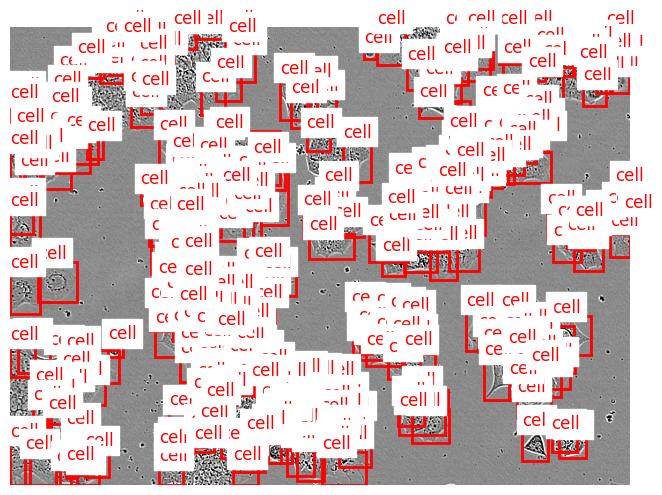

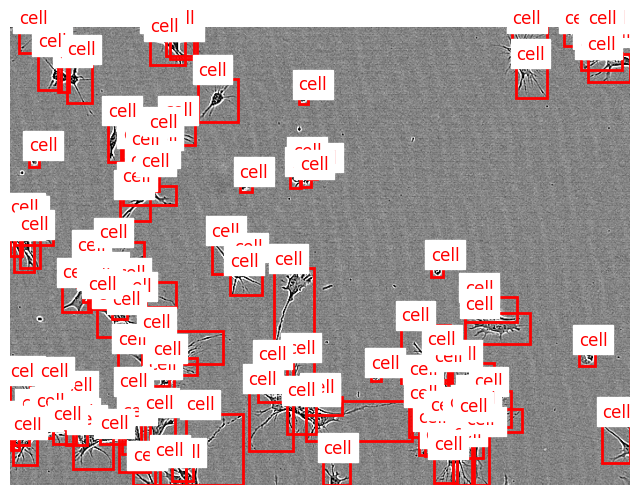

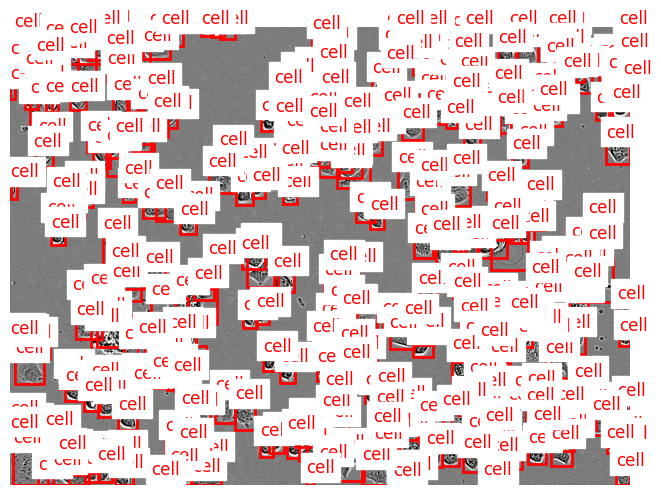

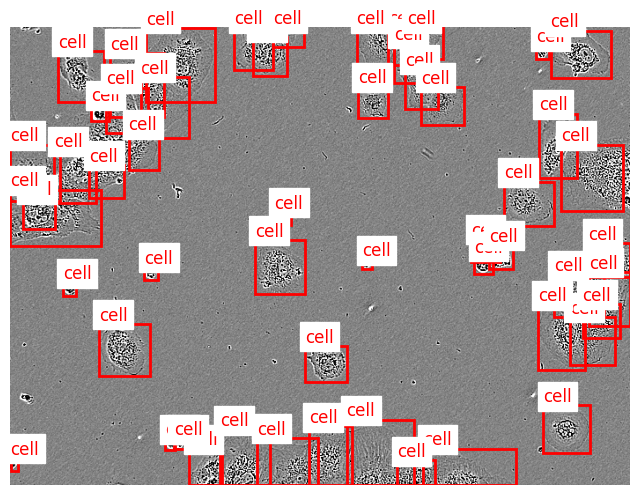

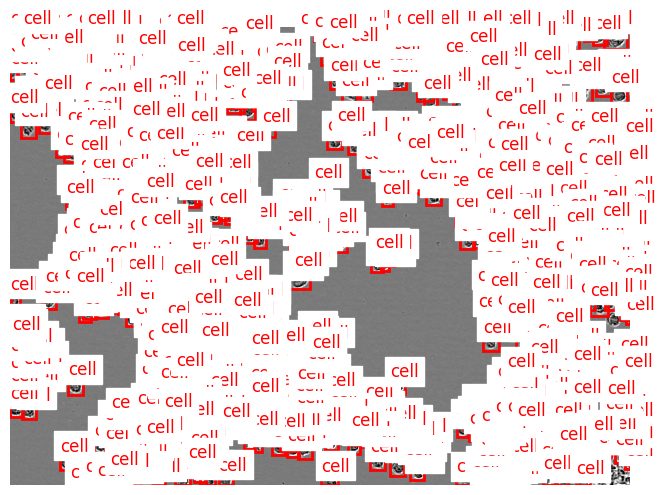

In [3]:
import os
import random
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.patches import Rectangle

# 設定路徑
#img_dir = '../data/kaggle_yolo/images/train'      # 你的 RGB 圖片資料夾 (.tif, .png, .jpg)
img_dir = '../data/livecell_yolo/images/train'      # 你的 RGB 圖片資料夾 (.tif, .png, .jpg)
#label_dir = '../data/kaggle_yolo/labels/train'
label_dir = '../data/livecell_yolo/labels/train'# 對應的 .txt 標註（YOLO 格式）

# 若有 class 名稱列表可以提供這裡
#class_names =  ['shsy5y', 'astro', 'cort']  # 根據你的 dataset 調整
class_names = ['cell']
def show_yolo_image(img_path, label_path):
    img = imread(img_path)
    h, w = img.shape[:2]

    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(img)
    ax.axis('off')

    if not os.path.exists(label_path):
        print(f"[⚠️] Label not found: {label_path}")
        return

    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            continue

        class_id, x_center, y_center, box_w, box_h = map(float, parts)

        # YOLO 格式轉 pixel 座標
        x = (x_center - box_w / 2) * w
        y = (y_center - box_h / 2) * h
        width = box_w * w
        height = box_h * h

        rect = Rectangle((x, y), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        class_label = int(class_id)
        class_text = class_names[class_label] if class_label < len(class_names) else str(class_label)
        ax.text(x, y - 5, class_text, color='red', fontsize=12, backgroundcolor='white')

    plt.show()

# 找出所有支援的圖像檔案
image_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.tif', '.png', '.jpg', '.jpeg'))]

# 隨機挑選 5 張（若不足 5 張就全部用）
sampled_files = random.sample(image_files, min(5, len(image_files)))

# 顯示
for img_file in sampled_files:
    img_path = os.path.join(img_dir, img_file)
    label_path = os.path.join(label_dir, os.path.splitext(img_file)[0] + '.txt')
    show_yolo_image(img_path, label_path)

